In [1]:
library(dbscan)
# library(umap)
library(ggplot2)
library(mclust)
library(Seurat)
library(cluster)
library(aricode)

source("../../dist_group.R")
source("../../MEV Diffu.R")
source("../../main_fun.R")

load("../Data/Oihane Diffu_out.Rdata")
load("../Data/Oihane viz_out.Rdata")
load("../Oihane.Rdata")
load("../all embeded dim 2.bin")
dat<-Oihane
cell.type=info=as.factor(Oihane.info.cellType)


##ADM
set.seed(2024)
options(repr.plot.width = 8, repr.plot.height = 5)
mev = mev.out$diffu.dist
umap_result <- umap(mev)
X_embedded <- umap_result
umap_clusters <- dbscan(X_embedded, eps = 2.8, minPts = 5)

cluster <- umap_clusters$cluster

# 将降维后的数据和标签组合成数据框
data <- data.frame(UMAP1 = X_embedded[, 1], UMAP2 = X_embedded[, 2], Cluster = as.factor(cluster))

# 确保数据框中没有无效值
data <- na.omit(data)
cluster = as.factor(cluster)
# 绘制可视化
color_list =c("#440154","#31688E", "#FDE725", "#35B779","#C49A98","#7E4D99","#f7a6a4","#53a362","#da3f34","#457b90","#767171","#4B3D7C","#5D7AD3","#A384BC","#4d982e","#E6873E","#545454","#aa3474","#ee8c7d","#2e5fa1","#fe87ac","#1d3557","#C22F2F","#036f73") 

p0 <- ggplot(data, aes(x = UMAP1, y = UMAP2)) +
  geom_point(alpha = 0.75) +
  labs(title = "visualization of ADM",
       x = "",
       y = " ") +
scale_color_manual(values = color_list) +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "none",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    guides(color = guide_legend(override.aes = list(size = 6,shape = 15, ncol = 2))) +
    theme(legend.key.height = unit(0.8, "cm"))

p1 <- ggplot(data, aes(x = UMAP1, y = UMAP2,color = info)) +
  geom_point(alpha = 0.75) +
  labs(title = "visualization of ADM",
       x = "",
       y = " ") +
scale_color_manual(values = color_list) +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "none",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    guides(color = guide_legend(override.aes = list(size = 6,shape = 15, ncol = 2))) +
    theme(legend.key.height = unit(0.8, "cm"))


p2 <- ggplot(data, aes(x = UMAP1, y = UMAP2,color = cluster)) +
  geom_point(alpha = 0.75) +
scale_color_manual(values = color_list) +
  labs(title = "visualization of ADM",
       x = "",
       y = " ") +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "none",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    theme(legend.key.height = unit(0.8, "cm"))
# 创建Seurat对象
seurat_object <- CreateSeuratObject(counts = t(dat))
seurat_object <- AddMetaData(seurat_object, metadata = cluster, col.name = 'cluster')
#标准化数据
seurat_object <- NormalizeData(seurat_object, normalization.method = "LogNormalize", scale.factor = 10000)

# 设定聚类标签为活动身份
seurat_object <- SetIdent(seurat_object, value = 'cluster')

# 如果已存在 'umap'，尝试删除旧的 UMAP 数据
if ("umap" %in% names(seurat_object@reductions)) {
    seurat_object@reductions$umap <- NULL
}
##
rownames(X_embedded) <- colnames(seurat_object)  ##保证细胞名称一致
# 将新的 UMAP 数据添加到 Seurat 对象
seurat_object[["umap"]] <- CreateDimReducObject(
  embeddings = X_embedded,
  key = "ADM_",
  assay = DefaultAssay(seurat_object)
)
# 查找标记基因
markers <- FindAllMarkers(seurat_object, only.pos = TRUE, min.pct = 0.2, logfc.threshold = 0.3, min.diff.pct = 0.25)
gene_list <- split(markers$gene, markers$cluster)



Attaching package: ‘dbscan’


The following object is masked from ‘package:stats’:

    as.dendrogram


Package 'mclust' version 6.1
Type 'citation("mclust")' for citing this R package in publications.

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built with package ‘Matrix’ 1.6.4 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: MASS

Loading required package: survival


Attaching package: ‘igraph’


The following object is masked from ‘package:Seurat’:

    components


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘MixGHD’


The following object is masked from ‘package:aricode’:

    ARI


Loading required package:

In [2]:
##Meta-spec
set.seed(2024)
mev = ensemble.out$ensemble.dist.mat
umap_result <- umap(mev)
X_embedded_viz <- umap_result
umap_clusters <- dbscan(X_embedded_viz, eps = 2, minPts = 5)
cluster_viz <- umap_clusters$cluster
cluster_viz = as.factor(cluster_viz)
# 将降维后的数据和标签组合成数据框
data <- data.frame(UMAP1 = X_embedded_viz[, 1], UMAP2 = X_embedded_viz[, 2], Cluster = as.factor(cluster_viz))
# 确保数据框中没有无效值
data <- na.omit(data)

# 绘制可视化
options(repr.plot.width = 9, repr.plot.height = 5)
p3 <- ggplot(data, aes(x = UMAP1, y = UMAP2)) +
  geom_point(alpha = 0.75) +
scale_color_manual(values = color_list) +
  labs(title = "visualization of Meta-spec ",
       x = "",
       y = " ") +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "right",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    theme(legend.key.height = unit(0.8, "cm"))

p4 <- ggplot(data, aes(x = UMAP1, y = UMAP2, color = Cluster)) +
  geom_point(alpha = 0.75) +
scale_color_manual(values = color_list) +
  labs(title = "Visualization of Meta-spec with DBSCAN Clusters",
       x = "",
       y = " ") +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "right",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    theme(legend.key.height = unit(0.8, "cm"))


p5 <- ggplot(data, aes(x = UMAP1, y = UMAP2, color = info)) +
  labs(title = "Visualization of Meta-spec with DBSCAN Clusters",
       x = "",
       y = " ") +
scale_color_manual(values = color_list) +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "none",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    theme(legend.key.height = unit(0.8, "cm"))

# 创建Seurat对象
seurat_object1 <- CreateSeuratObject(counts = t(dat))
seurat_object1 <- AddMetaData(seurat_object1, metadata = cluster_viz, col.name = 'cluster')
#标准化数据
seurat_object1 <- NormalizeData(seurat_object1, normalization.method = "LogNormalize", scale.factor = 10000)

# 设定聚类标签为活动身份
seurat_object1 <- SetIdent(seurat_object1, value = 'cluster')

# 如果已存在 'umap'，尝试删除旧的 UMAP 数据
if ("umap" %in% names(seurat_object1@reductions)) {
    seurat_object1@reductions$umap <- NULL
}
##
rownames(X_embedded_viz) <- colnames(seurat_object1)  ##保证细胞名称一致
# 将新的 UMAP 数据添加到 Seurat 对象
seurat_object1[["umap"]] <- CreateDimReducObject(
  embeddings = X_embedded_viz,
  key = "meta-spec_",
  assay = DefaultAssay(seurat_object1)
)

# 查找标记基因
markers1 <- FindAllMarkers(seurat_object1, only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.1, min.diff.pct = 0.2)
gene_list1 <- split(markers1$gene, markers1$cluster)


Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Normalizing layer: counts

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from meta-spec_ to metaspec_”
Warning message:
“No columnames present in cell embeddings, setting to 'metaspec_1:2'”
Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



In [3]:
###UMAP
##添加UMAP
X_embedded = e[[10]]
umap_clusters <- dbscan(X_embedded, eps = 1, minPts = 5)

cluster <- umap_clusters$cluster

# 将降维后的数据和标签组合成数据框
data <- data.frame(UMAP1 = X_embedded[, 1], UMAP2 = X_embedded[, 2], Cluster = as.factor(cluster))

# 确保数据框中没有无效值
data <- na.omit(data)

# 绘制可视化
p6 <- ggplot(data, aes(x = UMAP1, y = UMAP2)) +
  geom_point(alpha = 0.75) +
  labs(title = "Visualization of UMAP with DBSCAN Clusters",
       x = "",
       y = " ") +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "none",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    theme(legend.key.height = unit(0.8, "cm"))

p7 <-  ggplot(data, aes(x = UMAP1, y = UMAP2, color = info)) +
  geom_point(alpha = 0.75) +
  labs(title = "Visualization of UMAP with DBSCAN Clusters",
       x = "",
       y = " ") +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "none",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    theme(legend.key.height = unit(0.8, "cm"))

p8  <- ggplot(data, aes(x = UMAP1, y = UMAP2, color = Cluster)) +
  geom_point(alpha = 0.75) +
scale_color_manual(values = color_list) +
  labs(title = "Visualization of UMAP with DBSCAN Clusters",
       x = "",
       y = " ") +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "none",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    theme(legend.key.height = unit(0.8, "cm"))

# 创建Seurat对象
seurat_object2 <- CreateSeuratObject(counts = t(dat))
seurat_object2 <- AddMetaData(seurat_object2, metadata = cluster, col.name = 'cluster')
#标准化数据
seurat_object2 <- NormalizeData(seurat_object2, normalization.method = "LogNormalize", scale.factor = 10000)

# 设定聚类标签为活动身份
seurat_object2 <- SetIdent(seurat_object2, value = 'cluster')

# 如果已存在 'umap'，尝试删除旧的 UMAP 数据
if ("umap" %in% names(seurat_object2@reductions)) {
    seurat_object2@reductions$umap <- NULL
}
##
rownames(X_embedded) <- colnames(seurat_object2)  ##保证细胞名称一致
# 将新的 UMAP 数据添加到 Seurat 对象
seurat_object2[["umap"]] <- CreateDimReducObject(
  embeddings = X_embedded,
  key = "UMAP_",
  assay = DefaultAssay(seurat_object)
)
# 查找标记基因
markers2 <- FindAllMarkers(seurat_object2, only.pos = TRUE, min.pct = 0.2, logfc.threshold = 0.3, min.diff.pct = 0.25)
gene_list2 <- split(markers$gene, markers$cluster)


Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Normalizing layer: counts

Warning message:
“No columnames present in cell embeddings, setting to 'UMAP_1:2'”
Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5



In [4]:
###PKCA
##添加UMAP
X_embedded = e[[8]]
umap_clusters <- dbscan(X_embedded, eps = 5, minPts = 5)

cluster <- umap_clusters$cluster

# 将降维后的数据和标签组合成数据框
data <- data.frame(UMAP1 = X_embedded[, 1], UMAP2 = X_embedded[, 2], Cluster = as.factor(cluster))

# 确保数据框中没有无效值
data <- na.omit(data)

# 绘制可视化
p9 <- ggplot(data, aes(x = UMAP1, y = UMAP2)) +
  geom_point(alpha = 0.75) +
  labs(title = "Visualization of PCA with DBSCAN Clusters",
       x = "",
       y = " ") +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "none",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    theme(legend.key.height = unit(0.8, "cm"))

p10 <-  ggplot(data, aes(x = UMAP1, y = UMAP2, color = info)) +
  geom_point(alpha = 0.75) +
  labs(title = "Visualization of PCA with DBSCAN Clusters",
       x = "",
       y = " ") +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "none",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    theme(legend.key.height = unit(0.8, "cm"))

p11  <- ggplot(data, aes(x = UMAP1, y = UMAP2, color = Cluster)) +
  geom_point(alpha = 0.75) +
scale_color_manual(values = color_list) +
  labs(title = "Visualization of PCA with DBSCAN Clusters",
       x = "",
       y = " ") +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "none",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    theme(legend.key.height = unit(0.8, "cm"))

# 创建Seurat对象
seurat_object3 <- CreateSeuratObject(counts = t(dat))
seurat_object3 <- AddMetaData(seurat_object3, metadata = cluster, col.name = 'cluster')
#标准化数据
seurat_object3 <- NormalizeData(seurat_object3, normalization.method = "LogNormalize", scale.factor = 10000)

# 设定聚类标签为活动身份
seurat_object3 <- SetIdent(seurat_object3, value = 'cluster')

# 如果已存在 'umap'，尝试删除旧的 UMAP 数据
if ("umap" %in% names(seurat_object3@reductions)) {
    seurat_object3@reductions$umap <- NULL
}
##
rownames(X_embedded) <- colnames(seurat_object3)  ##保证细胞名称一致
# 将新的 UMAP 数据添加到 Seurat 对象
seurat_object3[["umap"]] <- CreateDimReducObject(
  embeddings = X_embedded,
  key = "kPCA_",
  assay = DefaultAssay(seurat_object)
)
# 查找标记基因
markers3 <- FindAllMarkers(seurat_object3, only.pos = TRUE, min.pct = 0.2, logfc.threshold = 0.3, min.diff.pct = 0.25)
gene_list3 <- split(markers$gene, markers$cluster)


Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Normalizing layer: counts

Calculating cluster 1

Warning message:
“No DE genes identified”
Warning message:
“The following tests were not performed: ”
Warning message:
“When testing 1 versus all:
	Cells in one or both identity groups are not present in the data requested”


In [5]:
###iMDS
##添加UMAP
X_embedded = e[[3]]
umap_clusters <- dbscan(X_embedded, eps = 5, minPts = 5)

cluster <- umap_clusters$cluster

# 将降维后的数据和标签组合成数据框
data <- data.frame(UMAP1 = X_embedded[, 1], UMAP2 = X_embedded[, 2], Cluster = as.factor(cluster))

# 确保数据框中没有无效值
data <- na.omit(data)

# 绘制可视化
p9 <- ggplot(data, aes(x = UMAP1, y = UMAP2)) +
  geom_point(alpha = 0.75) +
  labs(title = "Visualization of PCA with DBSCAN Clusters",
       x = "",
       y = " ") +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "none",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    theme(legend.key.height = unit(0.8, "cm"))

p10 <-  ggplot(data, aes(x = UMAP1, y = UMAP2, color = info)) +
  geom_point(alpha = 0.75) +
  labs(title = "Visualization of PCA with DBSCAN Clusters",
       x = "",
       y = " ") +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "none",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    theme(legend.key.height = unit(0.8, "cm"))

p11  <- ggplot(data, aes(x = UMAP1, y = UMAP2, color = Cluster)) +
  geom_point(alpha = 0.75) +
scale_color_manual(values = color_list) +
  labs(title = "Visualization of PCA with DBSCAN Clusters",
       x = "",
       y = " ") +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "none",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    theme(legend.key.height = unit(0.8, "cm"))

# 创建Seurat对象
seurat_object4 <- CreateSeuratObject(counts = t(dat))
seurat_object4 <- AddMetaData(seurat_object4, metadata = cluster, col.name = 'cluster')
#标准化数据
seurat_object4 <- NormalizeData(seurat_object4, normalization.method = "LogNormalize", scale.factor = 10000)

# 设定聚类标签为活动身份
seurat_object4 <- SetIdent(seurat_object4, value = 'cluster')

# 如果已存在 'umap'，尝试删除旧的 UMAP 数据
if ("umap" %in% names(seurat_object4@reductions)) {
    seurat_object4@reductions$umap <- NULL
}
##
rownames(X_embedded) <- colnames(seurat_object4)  ##保证细胞名称一致
# 将新的 UMAP 数据添加到 Seurat 对象
seurat_object4[["umap"]] <- CreateDimReducObject(
  embeddings = X_embedded,
  key = "iMDS_",
  assay = DefaultAssay(seurat_object)
)
# 查找标记基因
markers4 <- FindAllMarkers(seurat_object4, only.pos = TRUE, min.pct = 0.2, logfc.threshold = 0.3, min.diff.pct = 0.25)
gene_list4<- split(markers$gene, markers$cluster)


Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Normalizing layer: counts

Warning message:
“No columnames present in cell embeddings, setting to 'iMDS_1:2'”
Calculating cluster 1

Warning message:
“No DE genes identified”
Warning message:
“The following tests were not performed: ”
Warning message:
“When testing 1 versus all:
	Cells in one or both identity groups are not present in the data requested”


In [6]:
###tSNE
##添加UMAP
X_embedded = e[[12]]
umap_clusters <- dbscan(X_embedded, eps = 10, minPts = 5)

cluster <- umap_clusters$cluster

# 将降维后的数据和标签组合成数据框
data <- data.frame(UMAP1 = X_embedded[, 1], UMAP2 = X_embedded[, 2], Cluster = as.factor(cluster))

# 确保数据框中没有无效值
data <- na.omit(data)

# 绘制可视化
p9 <- ggplot(data, aes(x = UMAP1, y = UMAP2)) +
  geom_point(alpha = 0.75) +
  labs(title = "Visualization of PCA with DBSCAN Clusters",
       x = "",
       y = " ") +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "none",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    theme(legend.key.height = unit(0.8, "cm"))

p10 <-  ggplot(data, aes(x = UMAP1, y = UMAP2, color = info)) +
  geom_point(alpha = 0.75) +
  labs(title = "Visualization of PCA with DBSCAN Clusters",
       x = "",
       y = " ") +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "none",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    theme(legend.key.height = unit(0.8, "cm"))

p11  <- ggplot(data, aes(x = UMAP1, y = UMAP2, color = Cluster)) +
  geom_point(alpha = 0.75) +
scale_color_manual(values = color_list) +
  labs(title = "Visualization of PCA with DBSCAN Clusters",
       x = "",
       y = " ") +
    theme( panel.grid.major = element_blank(),  #移除栅格线
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),  # 设置背景为白色
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),  # 设置绘图区域边框
    panel.spacing = unit(0.1, "npc"),  # 将绘图区域整体压缩至原来的0.6倍
    legend.position = "none",  # 将图例放置在右侧
    axis.text = element_blank(),  # 隐藏刻度值
    axis.ticks = element_blank(),
          aspect.ratio = 0.8,
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5,size = 30))+
    theme(legend.key.height = unit(0.8, "cm"))

# 创建Seurat对象
seurat_object5 <- CreateSeuratObject(counts = t(dat))
seurat_object5 <- AddMetaData(seurat_object5, metadata = cluster, col.name = 'cluster')
#标准化数据
seurat_object5 <- NormalizeData(seurat_object5, normalization.method = "LogNormalize", scale.factor = 10000)

# 设定聚类标签为活动身份
seurat_object5 <- SetIdent(seurat_object5, value = 'cluster')

# 如果已存在 'umap'，尝试删除旧的 UMAP 数据
if ("umap" %in% names(seurat_object5@reductions)) {
    seurat_object5@reductions$umap <- NULL
}
##
rownames(X_embedded) <- colnames(seurat_object5)  ##保证细胞名称一致
# 将新的 UMAP 数据添加到 Seurat 对象
seurat_object5[["umap"]] <- CreateDimReducObject(
  embeddings = X_embedded,
  key = "tSNE_",
  assay = DefaultAssay(seurat_object)
)
# 查找标记基因
markers5 <- FindAllMarkers(seurat_object5, only.pos = TRUE, min.pct = 0.2, logfc.threshold = 0.3, min.diff.pct = 0.25)
gene_list5<- split(markers$gene, markers$cluster)


Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Normalizing layer: counts

Calculating cluster 1

Warning message:
“No DE genes identified”
Warning message:
“The following tests were not performed: ”
Warning message:
“When testing 1 versus all:
	Cells in one or both identity groups are not present in the data requested”


## MAG  APOD  Oligodendrocyte的marker

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


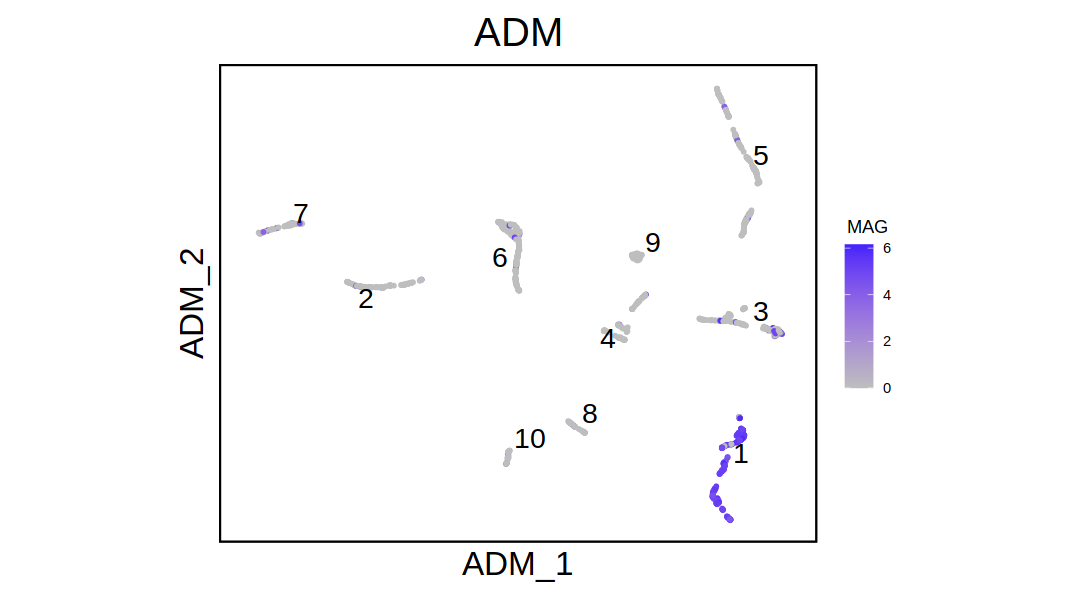

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


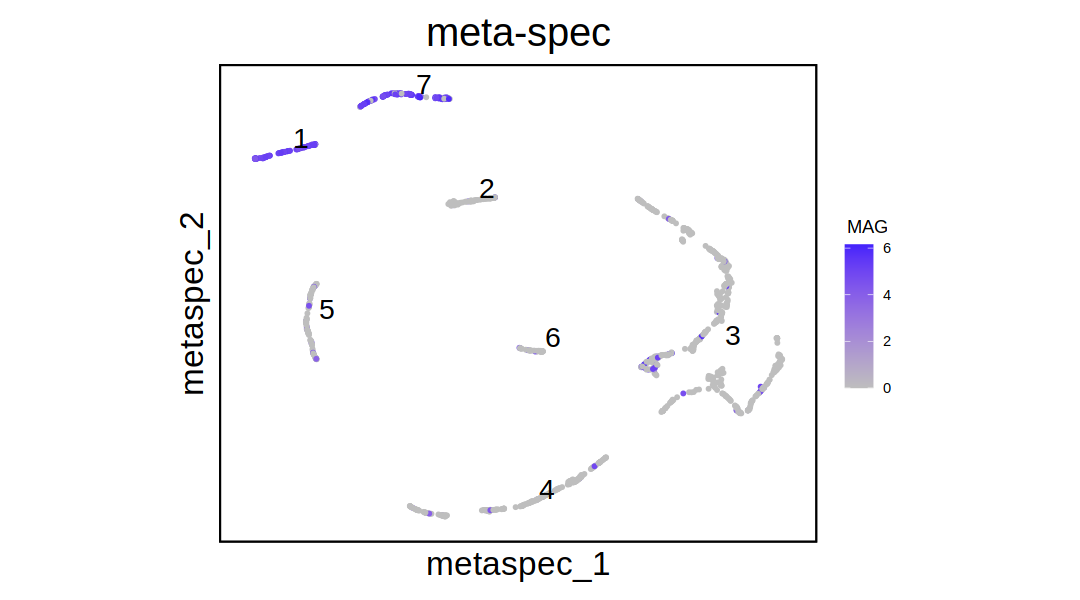

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


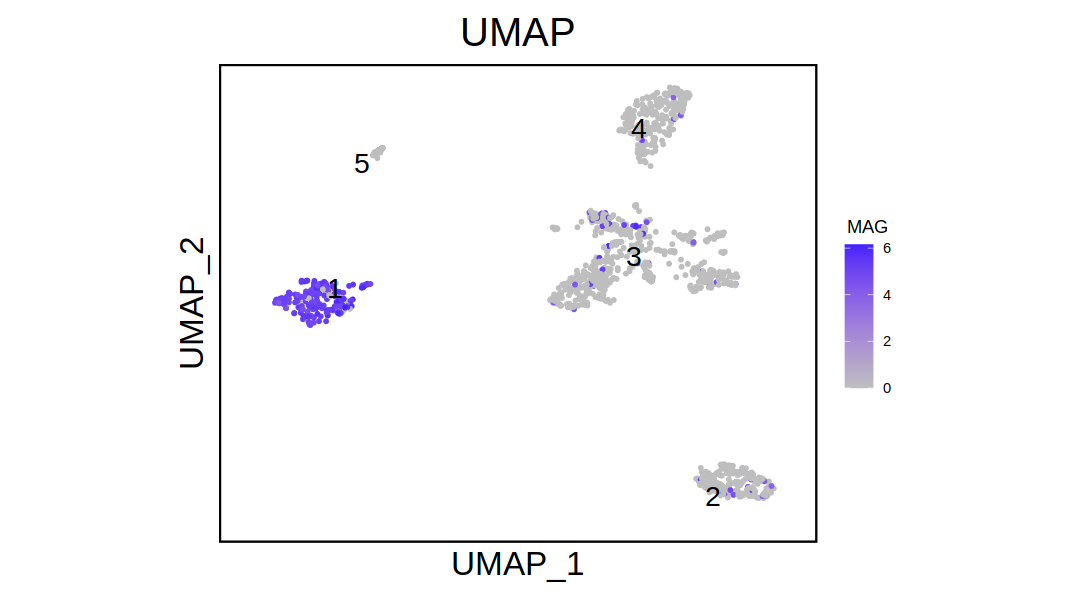

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


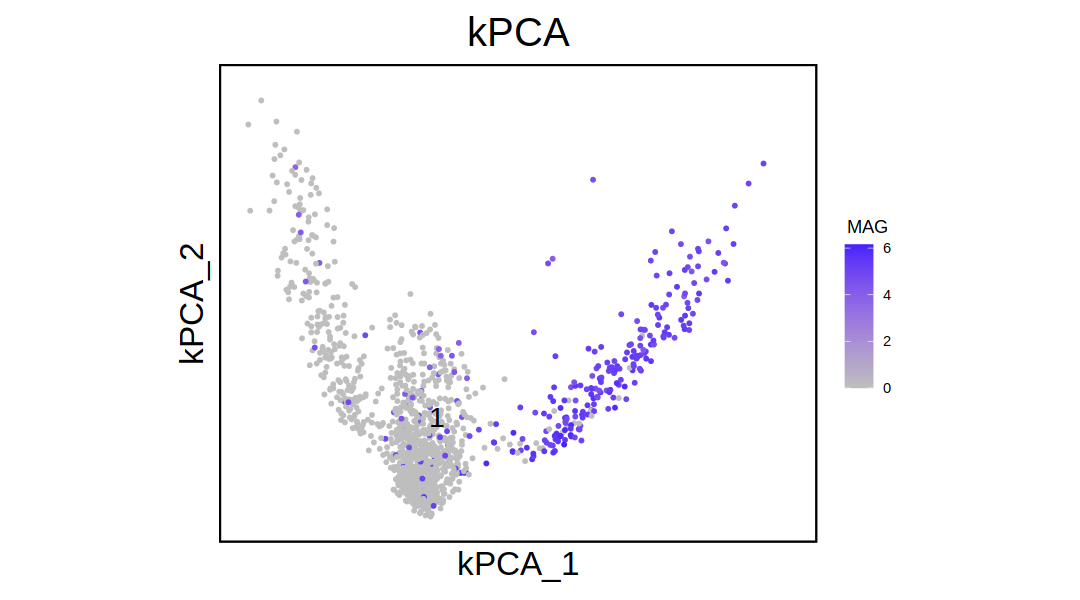

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


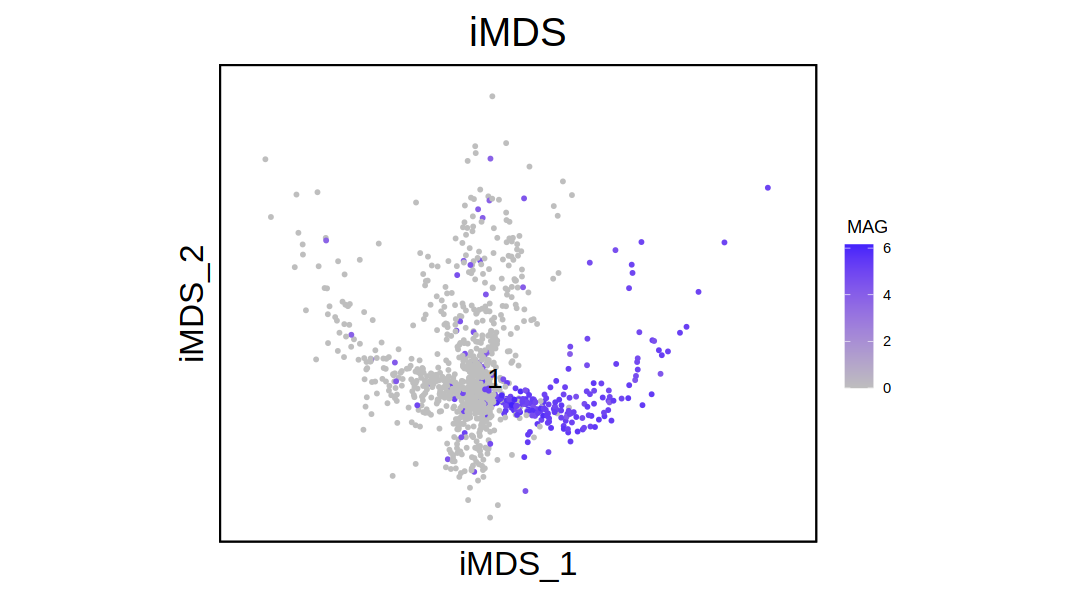

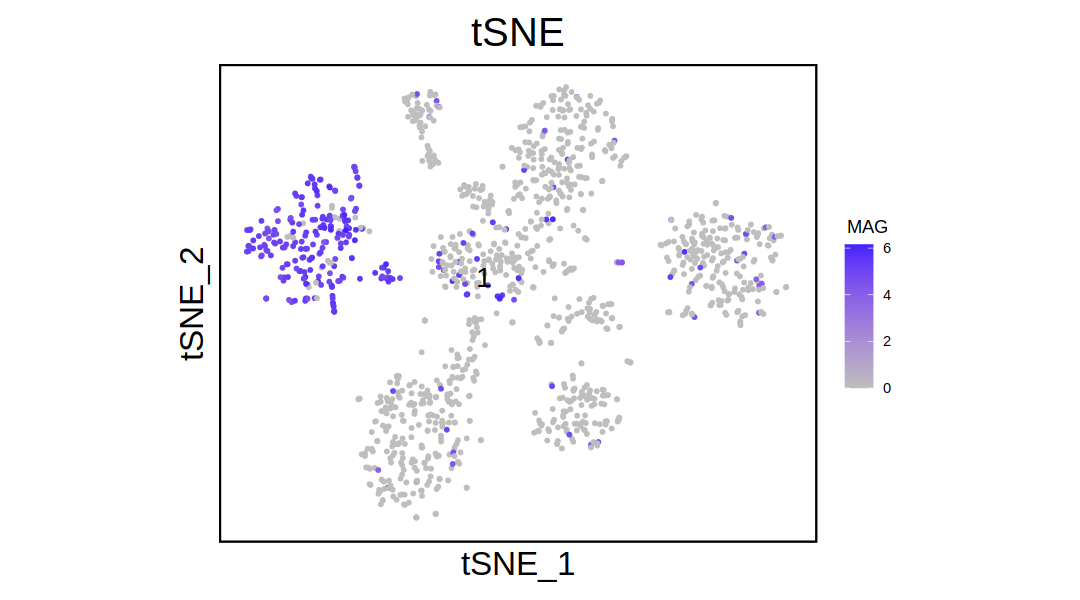

In [7]:
V_gene = "MAG"
axis_size = 20
title_size = 24
p <- FeaturePlot(seurat_object, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
    #     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
  guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "ADM") 

# 添加聚类标签
p <- LabelClusters(plot = p, id = "ident", size = 6)

# 打印图形
print(p)

p1 <- FeaturePlot(seurat_object1, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "meta-spec") 

# 添加聚类标签
p1 <- LabelClusters(plot = p1, id = "ident", size = 6)

# 打印图形
print(p1)


p2 <- FeaturePlot(seurat_object2, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "UMAP") 

# 添加聚类标签
p2 <- LabelClusters(plot = p2, id = "ident", size = 6)

# 打印图形
print(p2)

p3 <- FeaturePlot(seurat_object3, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "kPCA") 

# 添加聚类标签
p3 <- LabelClusters(plot = p3, id = "ident", size = 6)
print(p3)

p4<- FeaturePlot(seurat_object4, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "iMDS") 

# 添加聚类标签
p4 <- LabelClusters(plot = p4, id = "ident", size = 6)
print(p4)

p5<- FeaturePlot(seurat_object5, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "tSNE") 

# 添加聚类标签
p5 <- LabelClusters(plot = p5, id = "ident", size = 6)
print(p5)

ggsave(paste("Figure/ADM_",V_gene, ".png"), plot = p, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/meta_spec_",V_gene,".png"), plot = p1, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/UMAP_",V_gene, ".png"), plot = p2, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/kPCA_",V_gene, ".png"), plot = p3, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/iMDS_",V_gene, ".png"), plot = p4, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/tSNE_",V_gene, ".png"), plot = p5, width = 6, height = 4, dpi = 420)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


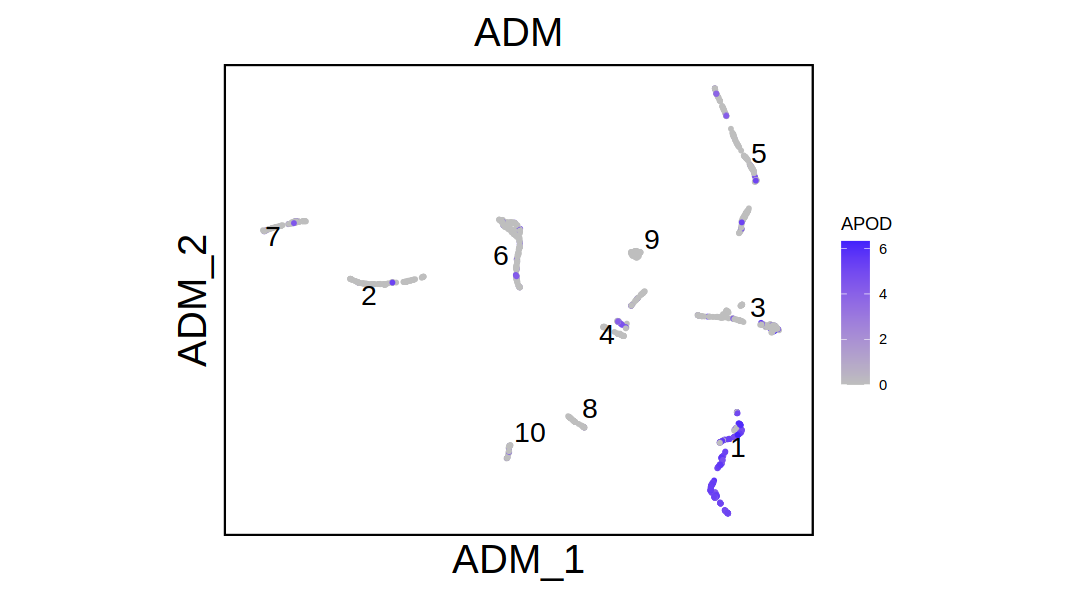

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


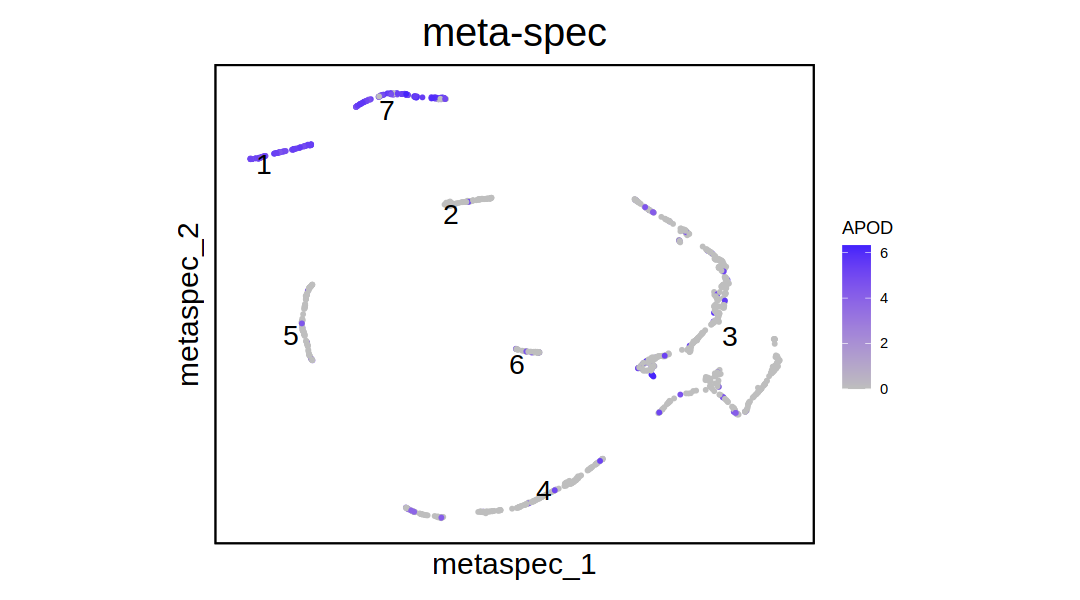

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


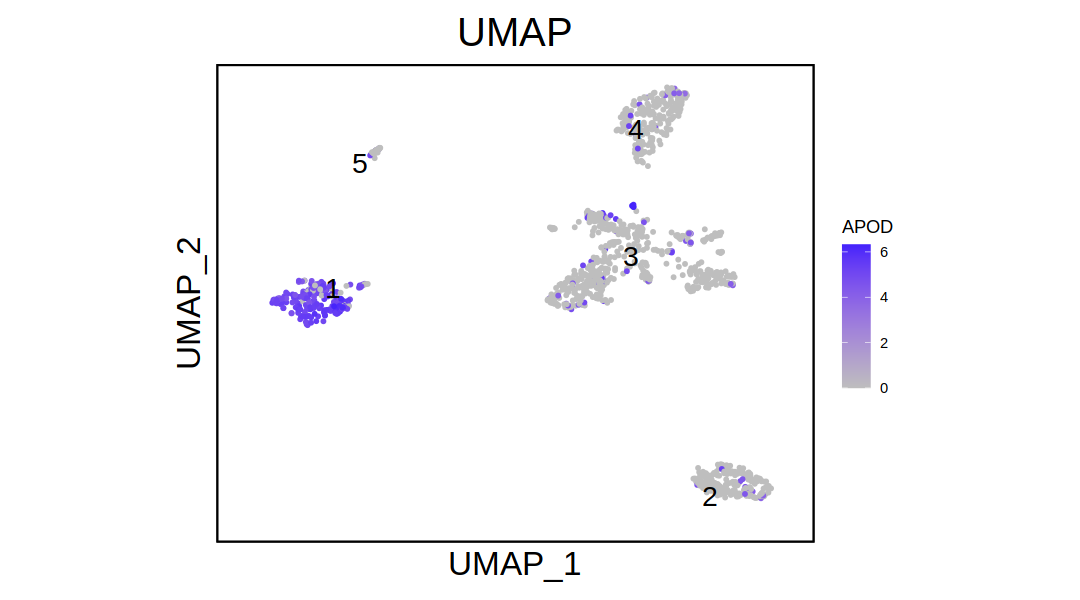

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


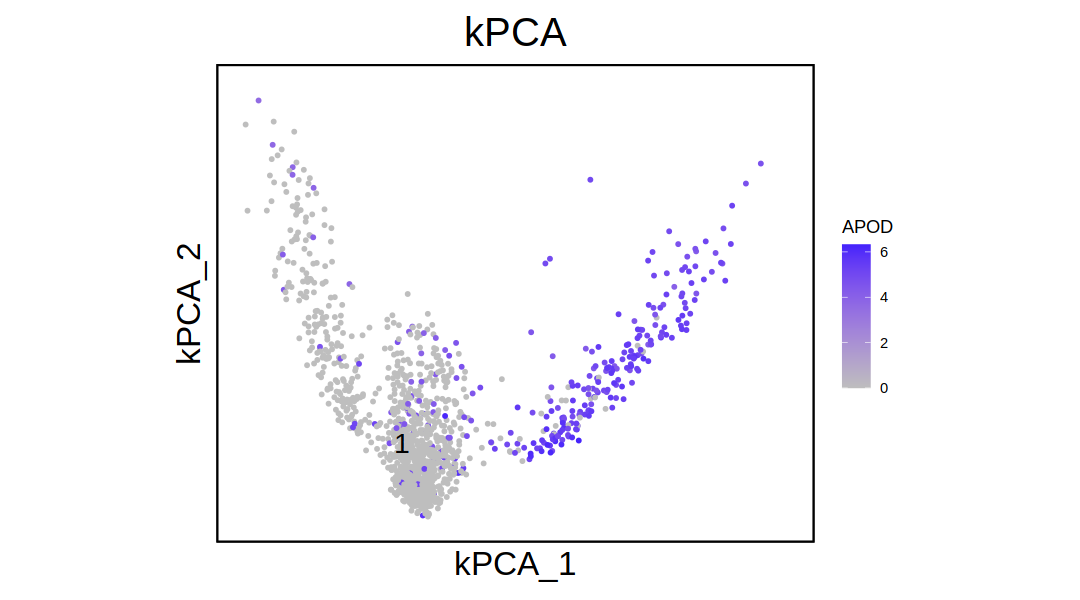

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


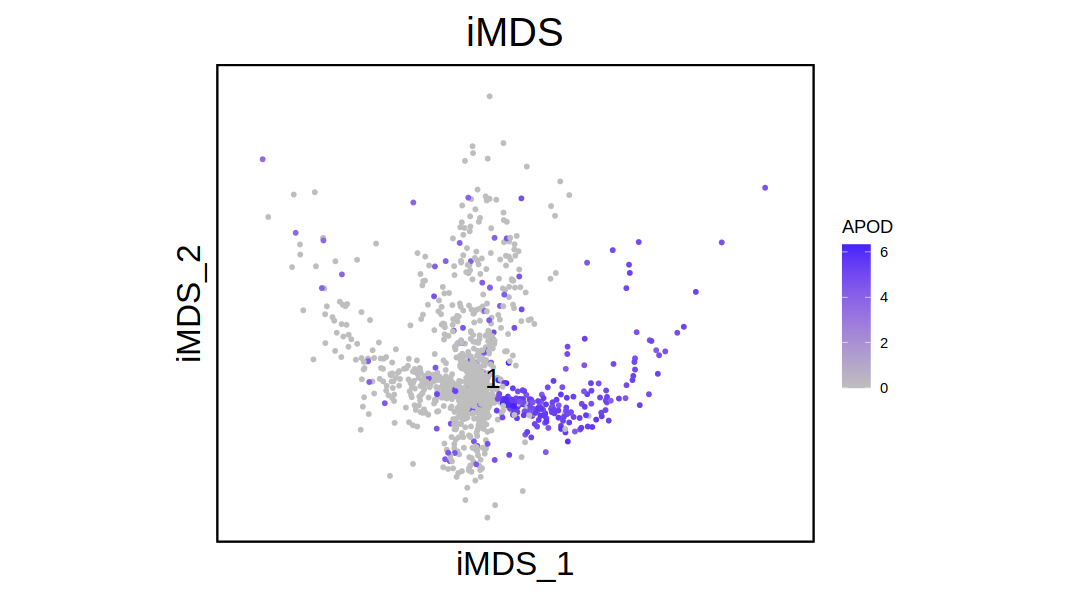

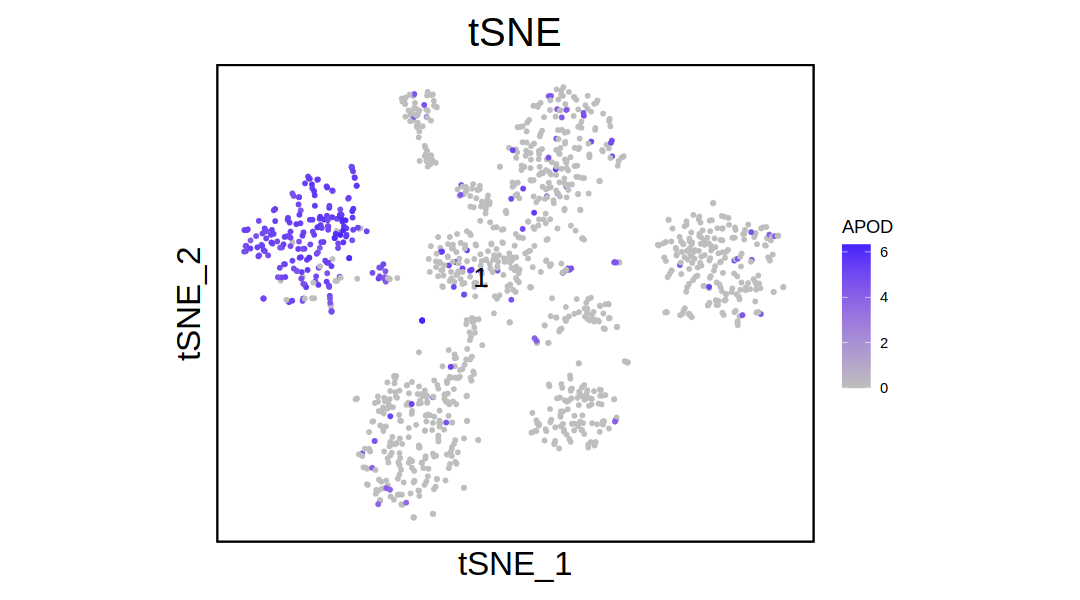

In [8]:
V_gene = "APOD"
p <- FeaturePlot(seurat_object, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
    #     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = title_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = title_size),
    plot.title = element_text(hjust = 0.5, size = 24)
  ) +
  guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "ADM") 

# 添加聚类标签
p <- LabelClusters(plot = p, id = "ident", size = 6)

# 打印图形
print(p)

p1 <- FeaturePlot(seurat_object1, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = 18),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = 18),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "meta-spec") 

# 添加聚类标签
p1 <- LabelClusters(plot = p1, id = "ident", size = 6)

# 打印图形
print(p1)


p2 <- FeaturePlot(seurat_object2, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "UMAP") 

# 添加聚类标签
p2 <- LabelClusters(plot = p2, id = "ident", size = 6)
print(p2)

p3 <- FeaturePlot(seurat_object3, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "kPCA") 

# 添加聚类标签
p3 <- LabelClusters(plot = p3, id = "ident", size = 6)

# 打印图形
print(p3)

p4<- FeaturePlot(seurat_object4, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "iMDS") 

# 添加聚类标签
p4 <- LabelClusters(plot = p4, id = "ident", size = 6)
print(p4)


p5<- FeaturePlot(seurat_object5, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "tSNE") 

# 添加聚类标签
p5 <- LabelClusters(plot = p5, id = "ident", size = 6)
print(p5)

ggsave(paste("Figure/ADM_",V_gene, ".png"), plot = p, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/meta_spec_",V_gene,".png"), plot = p1, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/UMAP_",V_gene, ".png"), plot = p2, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/kPCA_",V_gene, ".png"), plot = p3, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/iMDS_",V_gene, ".png"), plot = p4, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/tSNE_",V_gene, ".png"), plot = p5, width = 6, height = 4, dpi = 420)

## PLPP3\SLC1A2  Astrocyte的MARKER

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


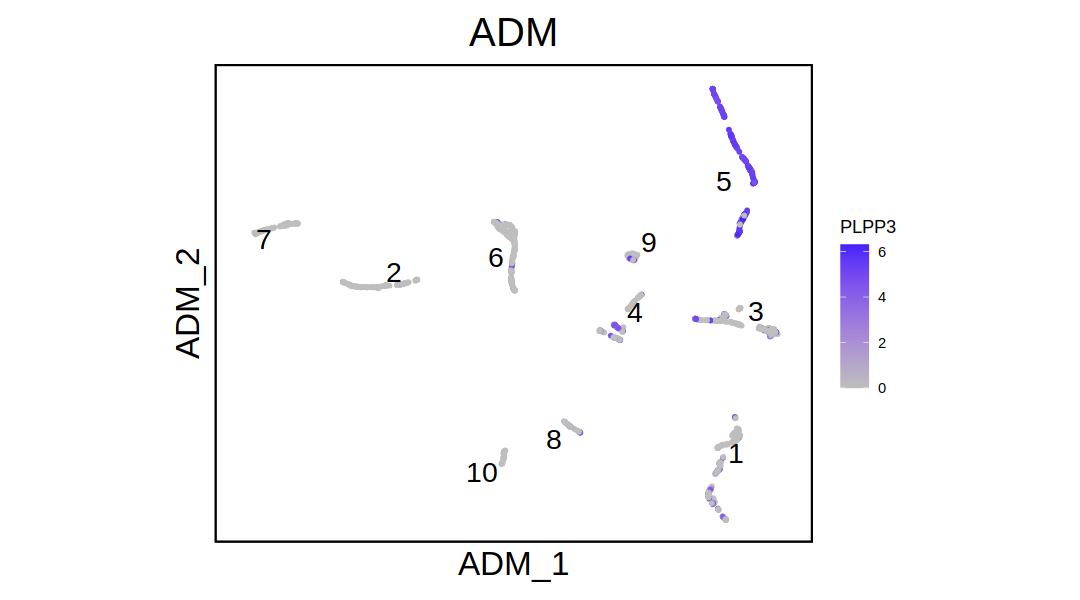

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


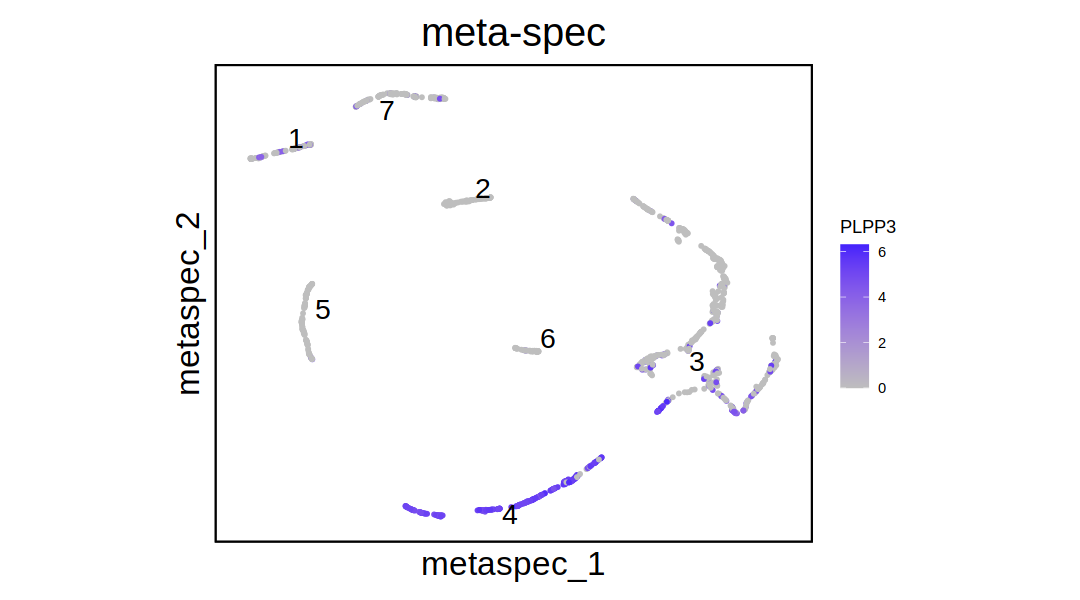

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


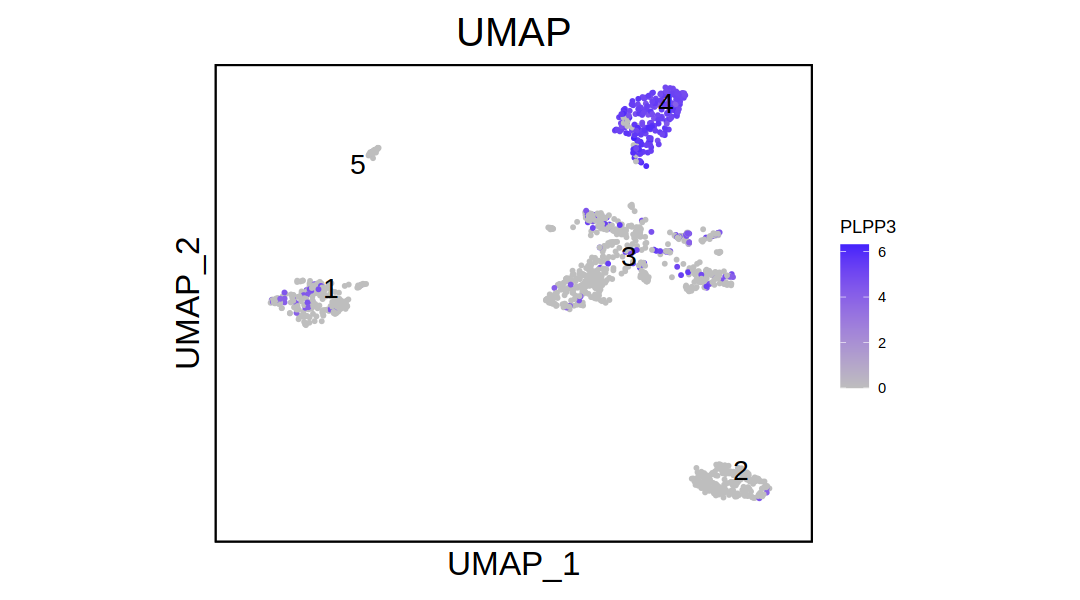

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


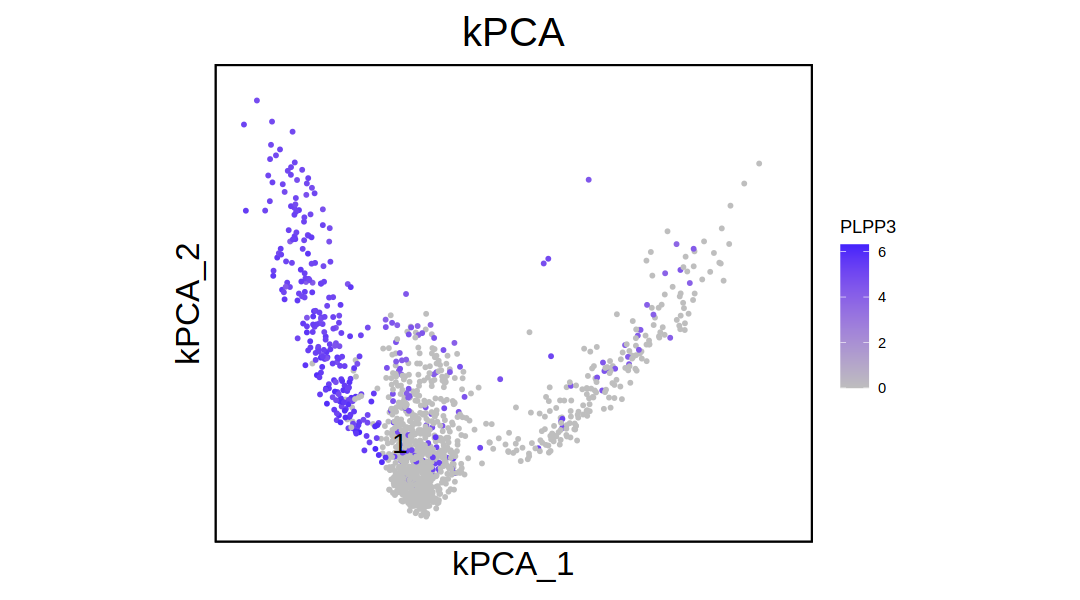

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


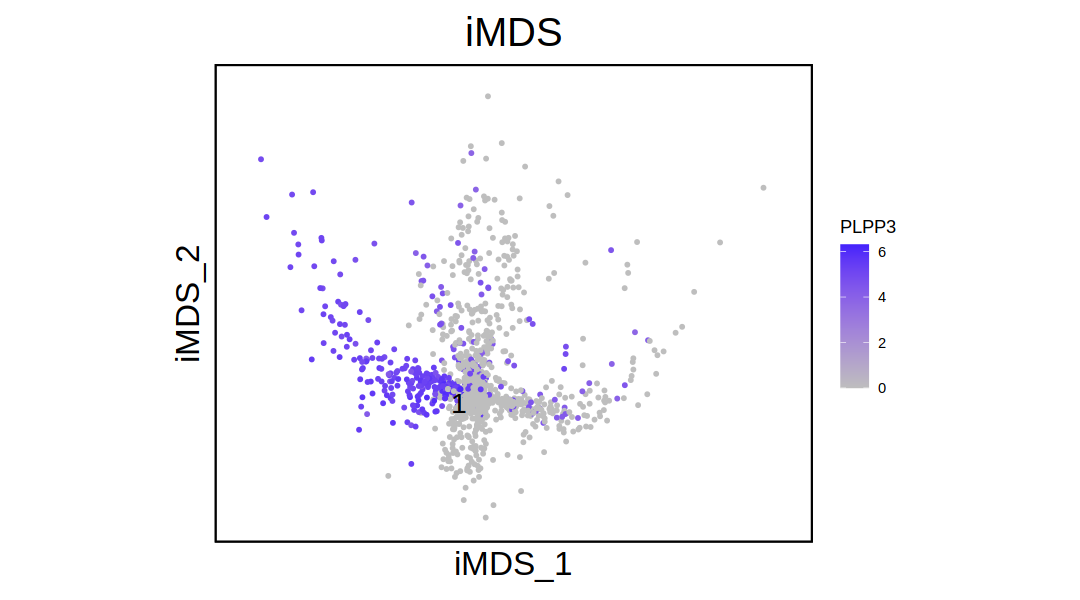

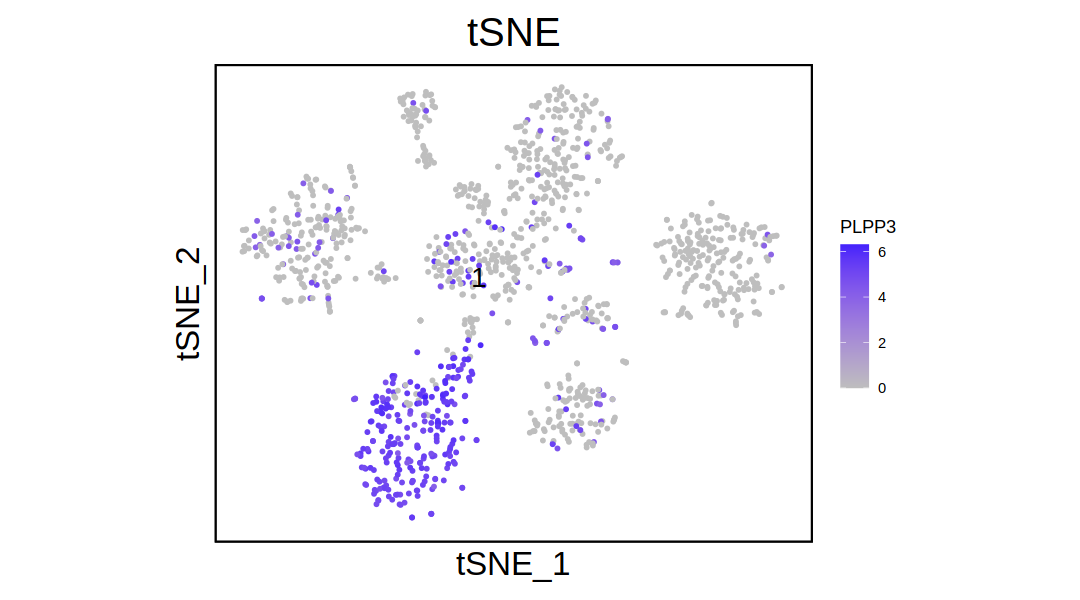

In [9]:
V_gene = "PLPP3"
p <- FeaturePlot(seurat_object, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
    #     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
  guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "ADM") 

# 添加聚类标签
p <- LabelClusters(plot = p, id = "ident", size = 6)

# 打印图形
print(p)

p1 <- FeaturePlot(seurat_object1, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "meta-spec") 

# 添加聚类标签
p1 <- LabelClusters(plot = p1, id = "ident", size = 6)

# 打印图形
print(p1)

p2 <- FeaturePlot(seurat_object2, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "UMAP") 

# 添加聚类标签
p2 <- LabelClusters(plot = p2, id = "ident", size = 6)

# 打印图形
print(p2)
p3 <- FeaturePlot(seurat_object3, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "kPCA") 

# 添加聚类标签
p3 <- LabelClusters(plot = p3, id = "ident", size = 6)

# 打印图形
print(p3)


p4<- FeaturePlot(seurat_object4, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "iMDS") 

# 添加聚类标签
p4 <- LabelClusters(plot = p4, id = "ident", size = 6)
print(p4)

p5<- FeaturePlot(seurat_object5, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "tSNE") 

# 添加聚类标签
p5 <- LabelClusters(plot = p5, id = "ident", size = 6)
print(p5)

ggsave(paste("Figure/ADM_",V_gene, ".png"), plot = p, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/meta_spec_",V_gene,".png"), plot = p1, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/UMAP_",V_gene, ".png"), plot = p2, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/kPCA_",V_gene, ".png"), plot = p3, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/iMDS_",V_gene, ".png"), plot = p4, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/tSNE_",V_gene, ".png"), plot = p5, width = 6, height = 4, dpi = 420)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


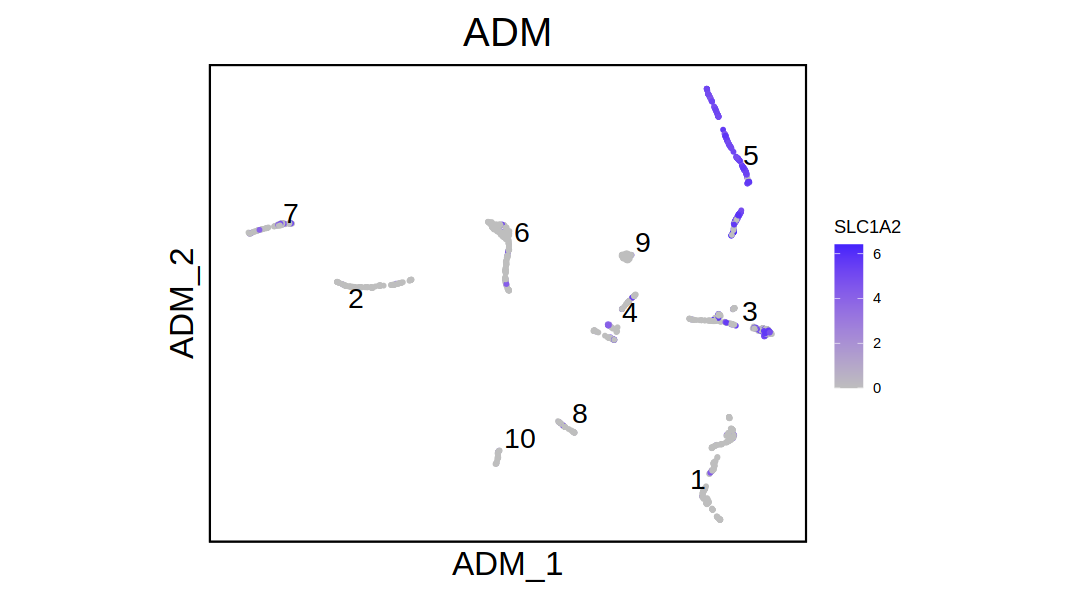

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


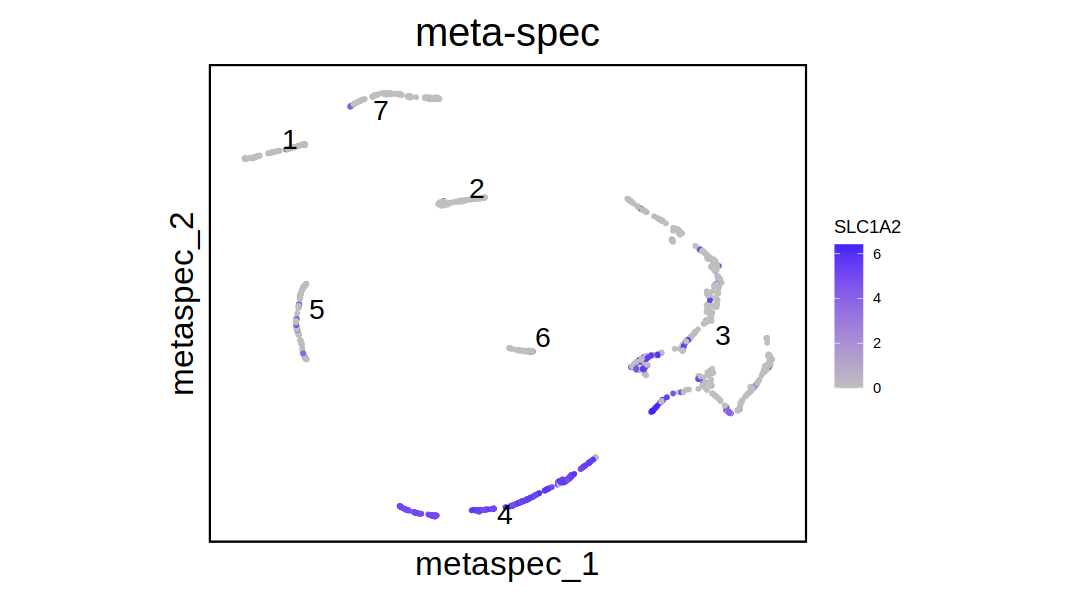

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


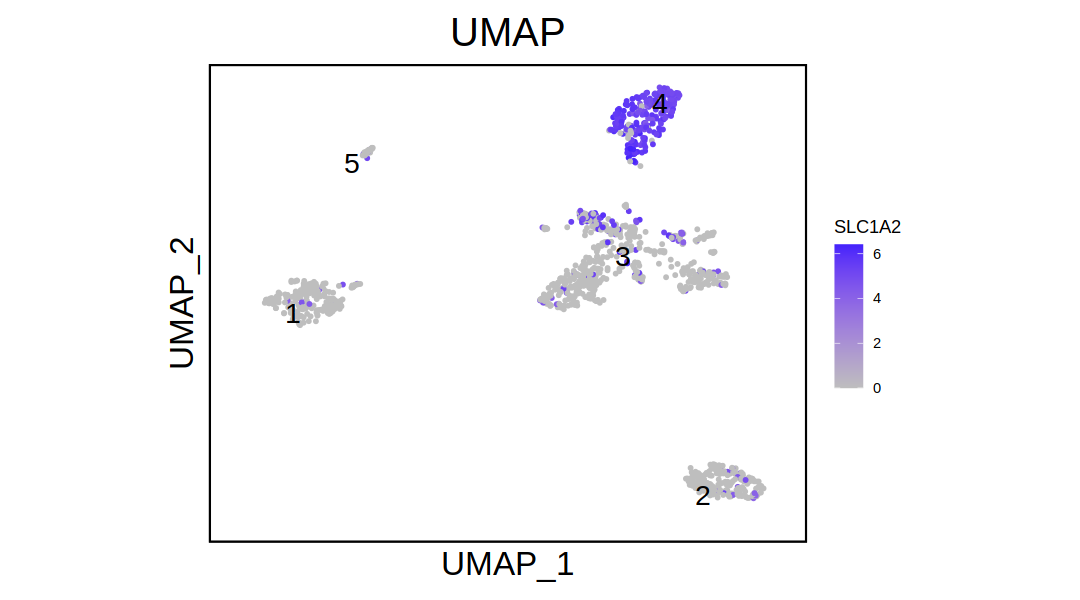

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


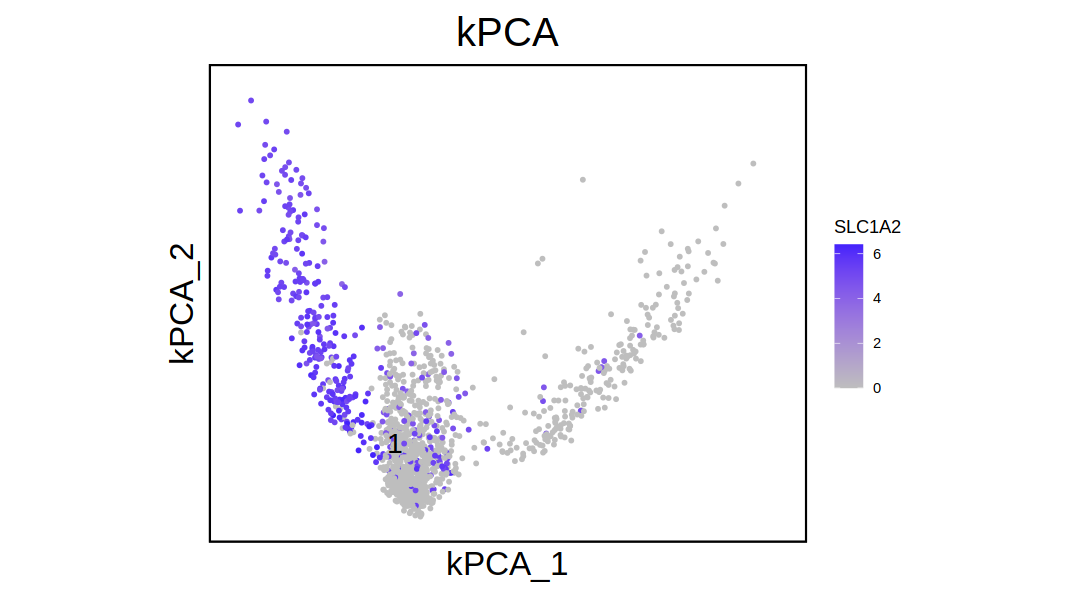

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


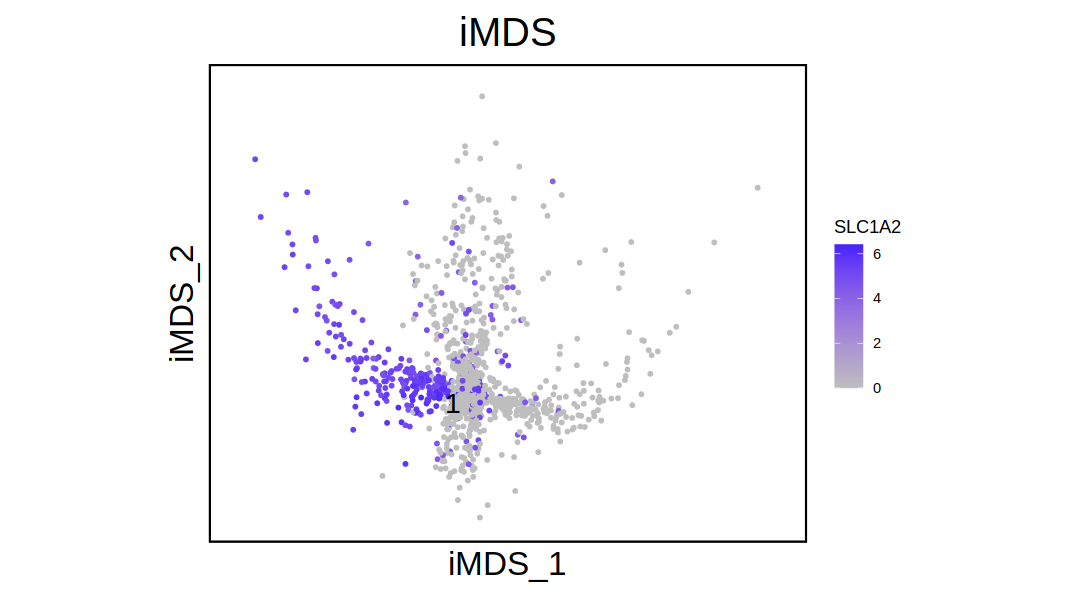

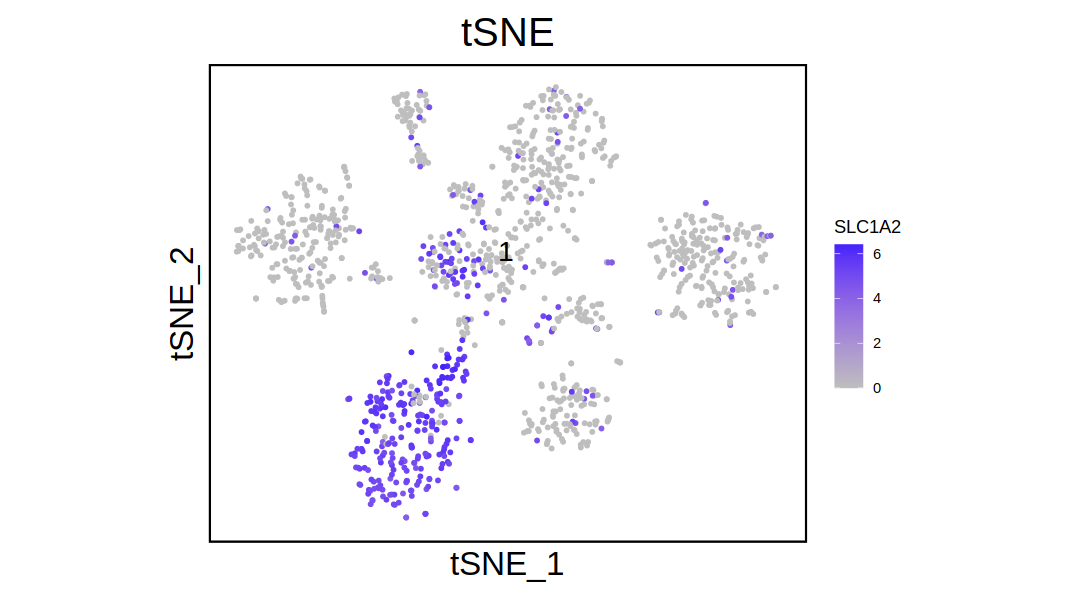

In [10]:
V_gene = "SLC1A2"
p <- FeaturePlot(seurat_object, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
    #     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
  guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "ADM") 

# 添加聚类标签
p <- LabelClusters(plot = p, id = "ident", size = 6)

# 打印图形
print(p)

p1 <- FeaturePlot(seurat_object1, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "meta-spec") 

# 添加聚类标签
p1 <- LabelClusters(plot = p1, id = "ident", size = 6)

# 打印图形
print(p1)

p2 <- FeaturePlot(seurat_object2, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "UMAP") 

# 添加聚类标签
p2 <- LabelClusters(plot = p2, id = "ident", size = 6)

# 打印图形
print(p2)
p3 <- FeaturePlot(seurat_object3, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "kPCA") 

# 添加聚类标签
p3 <- LabelClusters(plot = p3, id = "ident", size = 6)

# 打印图形
print(p3)

p4<- FeaturePlot(seurat_object4, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "iMDS") 

# 添加聚类标签
p4 <- LabelClusters(plot = p4, id = "ident", size = 6)
print(p4)


p5<- FeaturePlot(seurat_object5, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "tSNE") 

# 添加聚类标签
p5 <- LabelClusters(plot = p5, id = "ident", size = 6)
print(p5)

ggsave(paste("Figure/ADM_",V_gene, ".png"), plot = p, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/meta_spec_",V_gene,".png"), plot = p1, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/UMAP_",V_gene, ".png"), plot = p2, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/kPCA_",V_gene, ".png"), plot = p3, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/iMDS_",V_gene, ".png"), plot = p4, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/tSNE_",V_gene, ".png"), plot = p5, width = 6, height = 4, dpi = 420)

## PLTP Endothelial cell的marker

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


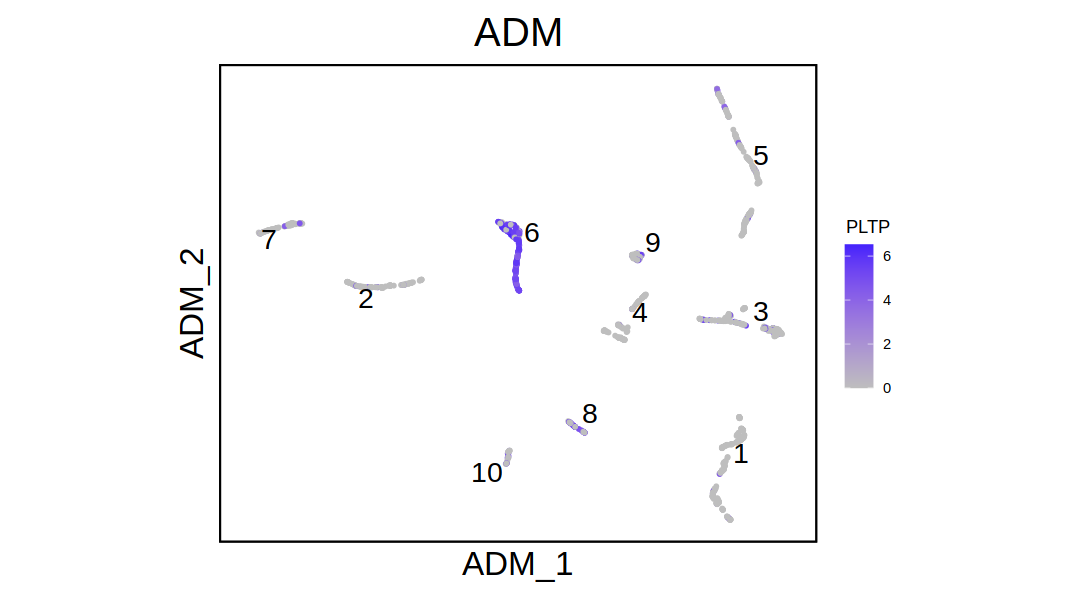

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


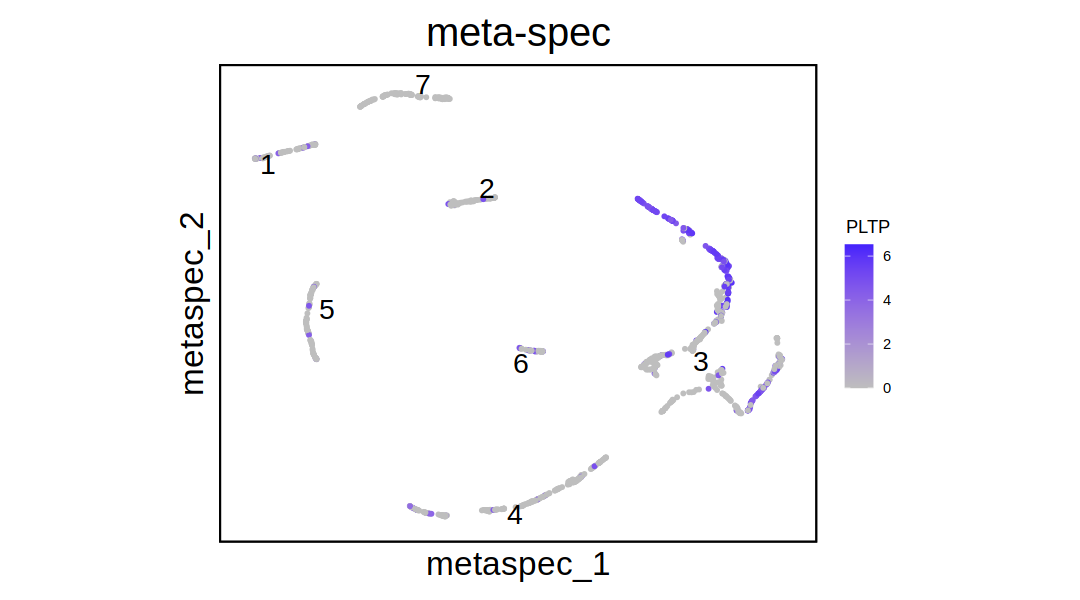

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


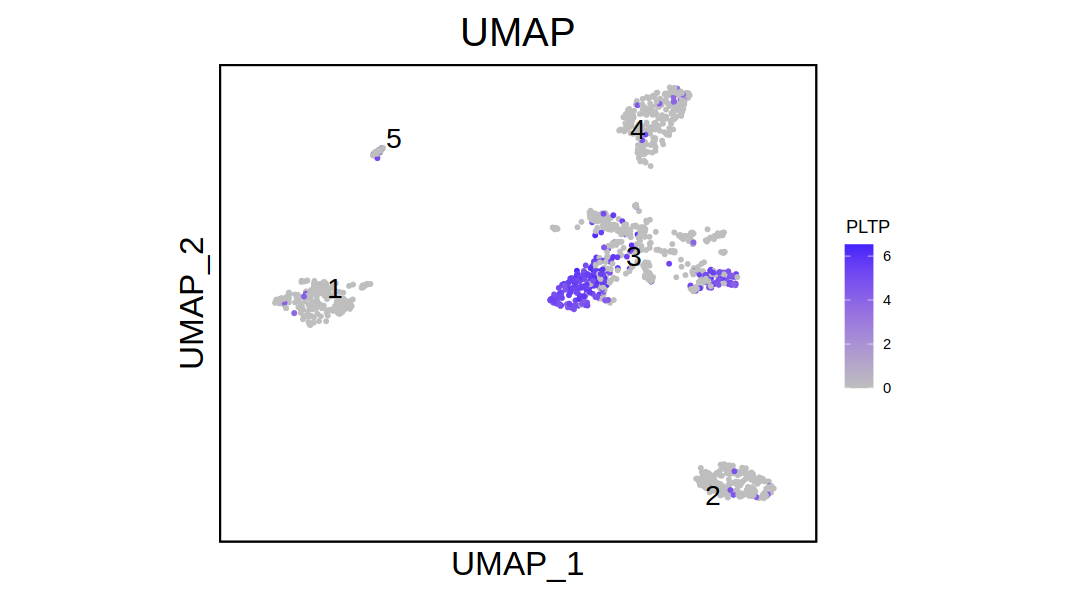

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


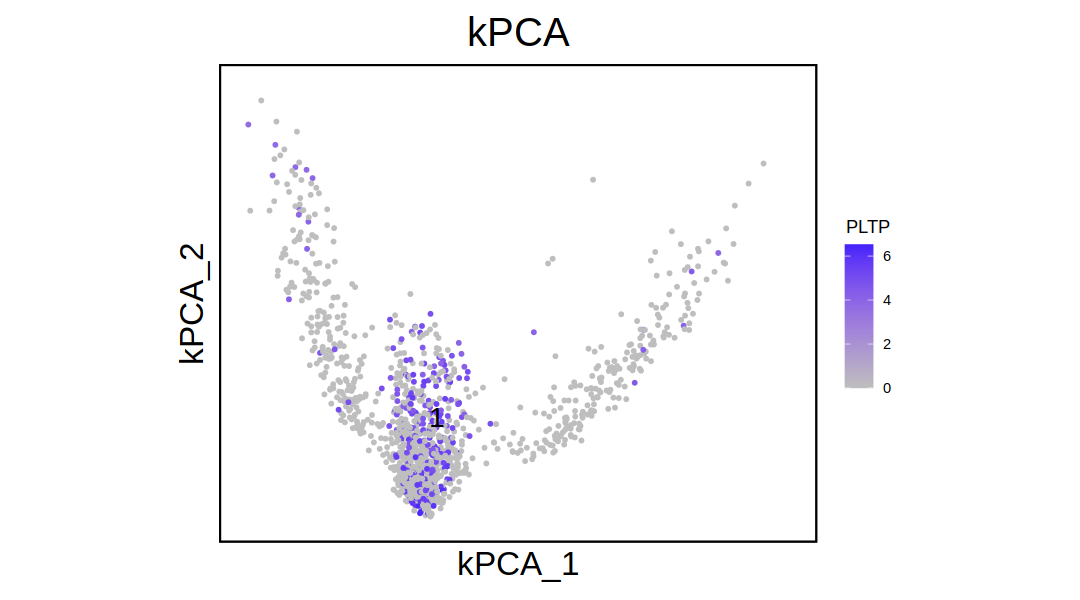

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


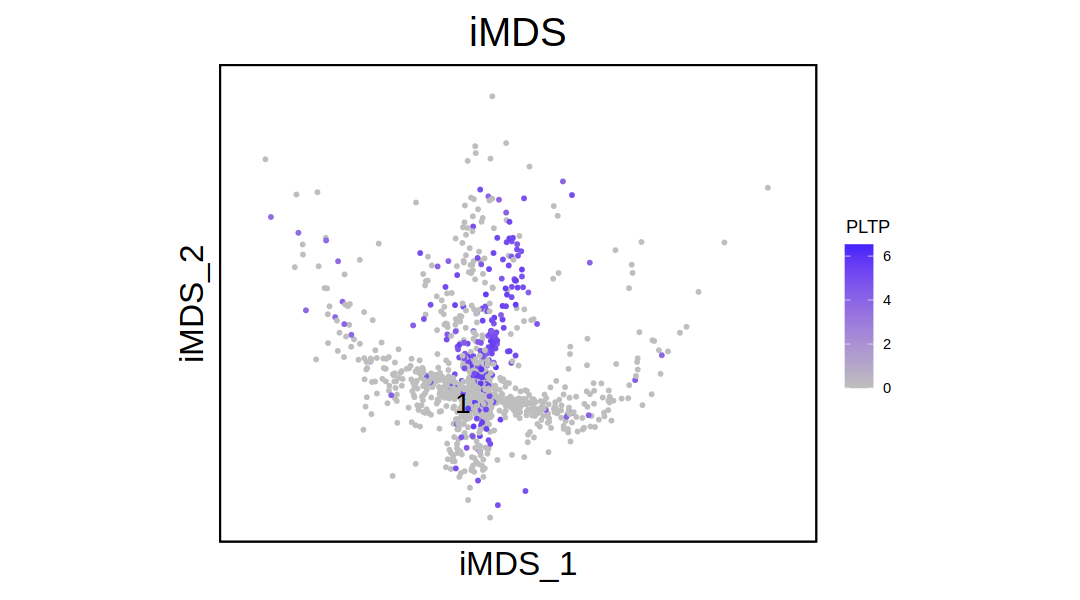

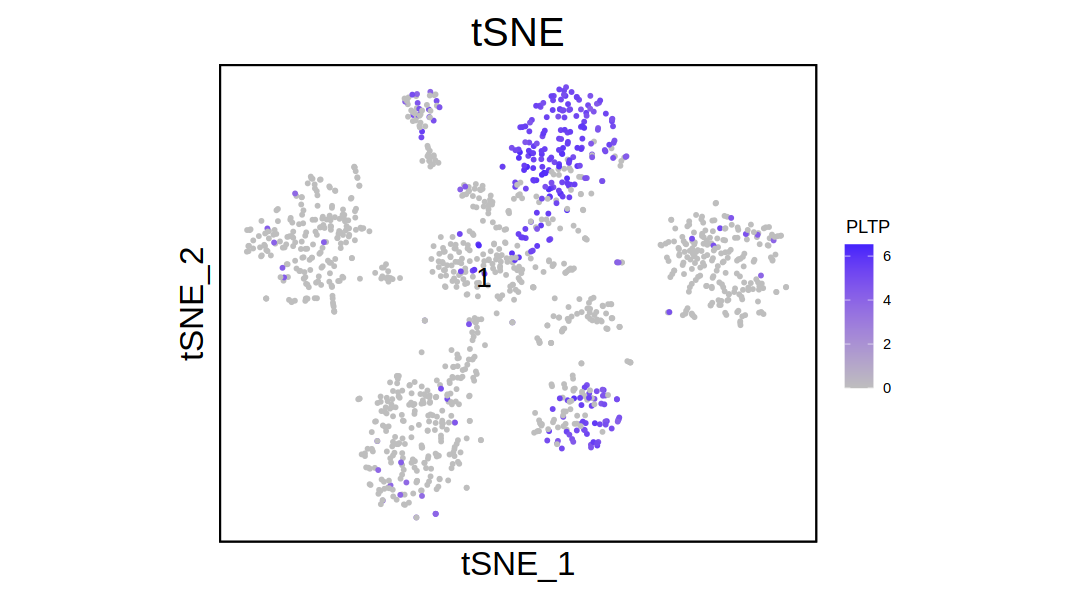

In [11]:
V_gene = "PLTP"
p <- FeaturePlot(seurat_object, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
    #     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
  guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "ADM") 

# 添加聚类标签
p <- LabelClusters(plot = p, id = "ident", size = 6)

# 打印图形
print(p)

p1 <- FeaturePlot(seurat_object1, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "meta-spec") 

# 添加聚类标签
p1 <- LabelClusters(plot = p1, id = "ident", size = 6)

# 打印图形
print(p1)

p2 <- FeaturePlot(seurat_object2, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title =V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "UMAP") 

# 添加聚类标签
p2 <- LabelClusters(plot = p2, id = "ident", size = 6)

# 打印图形
print(p2)
p3 <- FeaturePlot(seurat_object3, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "kPCA") 

# 添加聚类标签
p3 <- LabelClusters(plot = p3, id = "ident", size = 6)

# 打印图形
print(p3)


p4<- FeaturePlot(seurat_object4, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "iMDS") 

# 添加聚类标签
p4 <- LabelClusters(plot = p4, id = "ident", size = 6)
print(p4)


p5<- FeaturePlot(seurat_object5, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "tSNE") 

# 添加聚类标签
p5 <- LabelClusters(plot = p5, id = "ident", size = 6)
print(p5)

ggsave(paste("Figure/ADM_",V_gene, ".png"), plot = p, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/meta_spec_",V_gene,".png"), plot = p1, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/UMAP_",V_gene, ".png"), plot = p2, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/kPCA_",V_gene, ".png"), plot = p3, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/iMDS_",V_gene, ".png"), plot = p4, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/tSNE_",V_gene, ".png"), plot = p5, width = 6, height = 4, dpi = 420)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


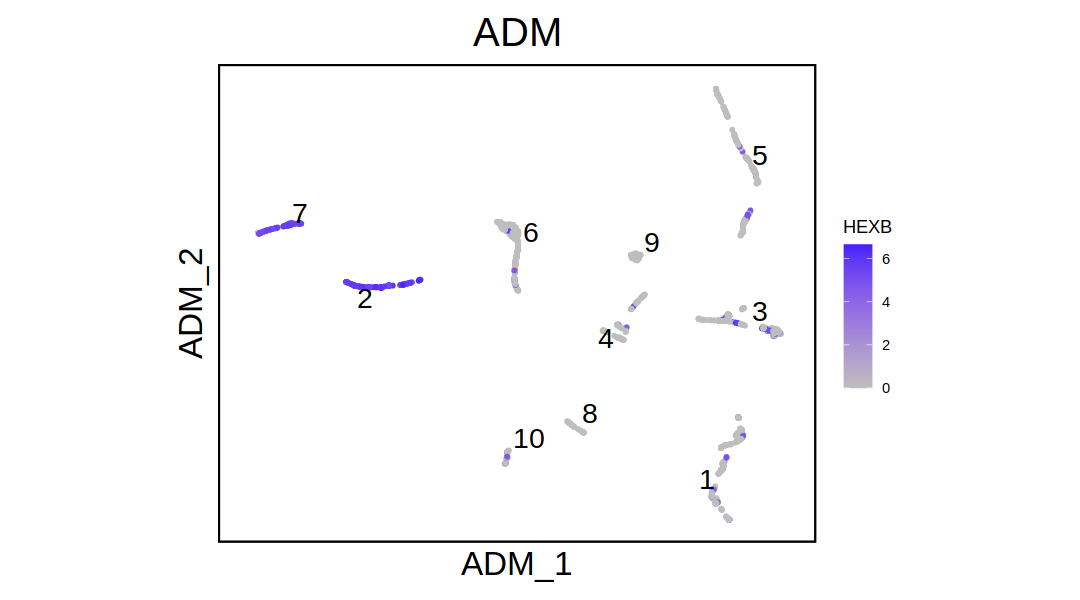

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


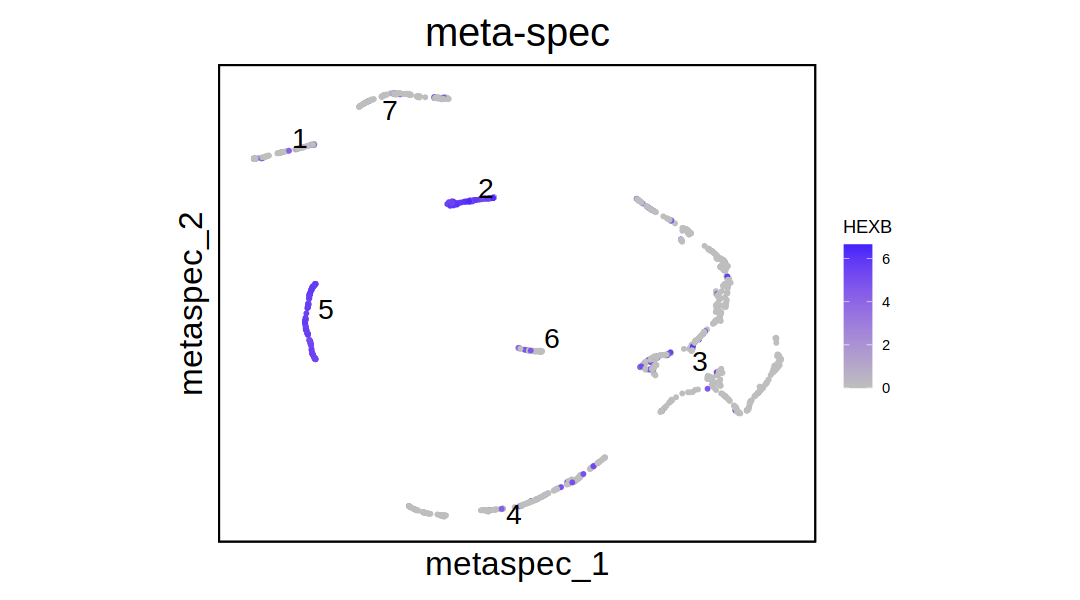

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


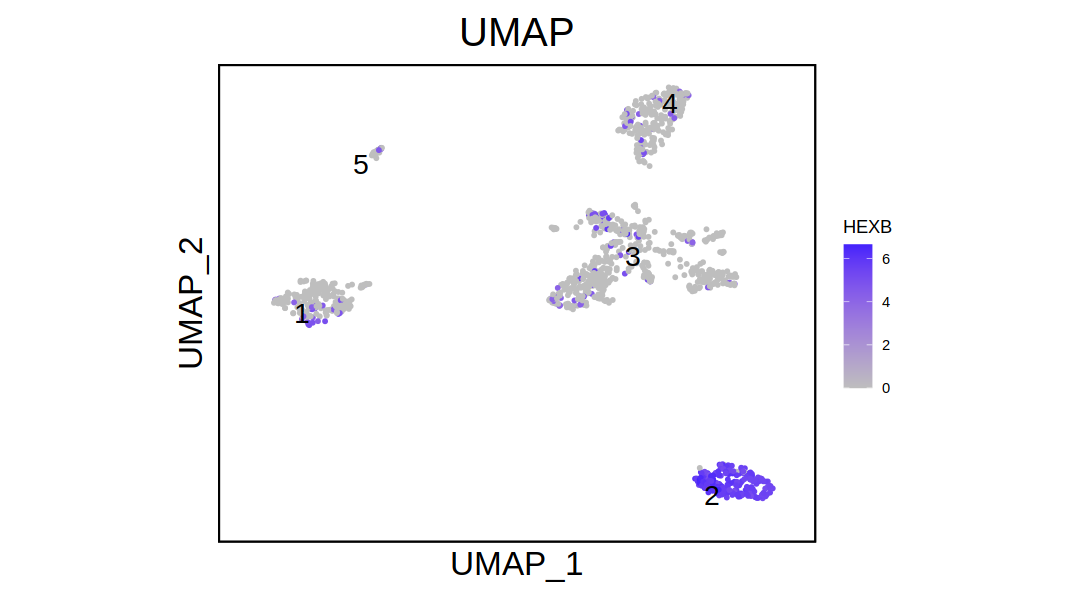

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


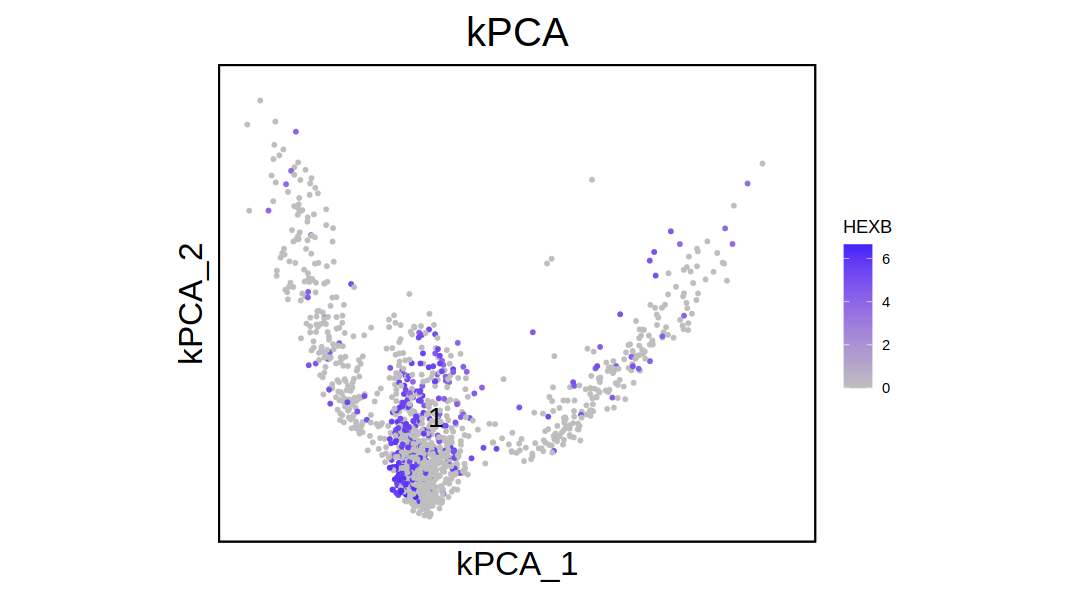

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


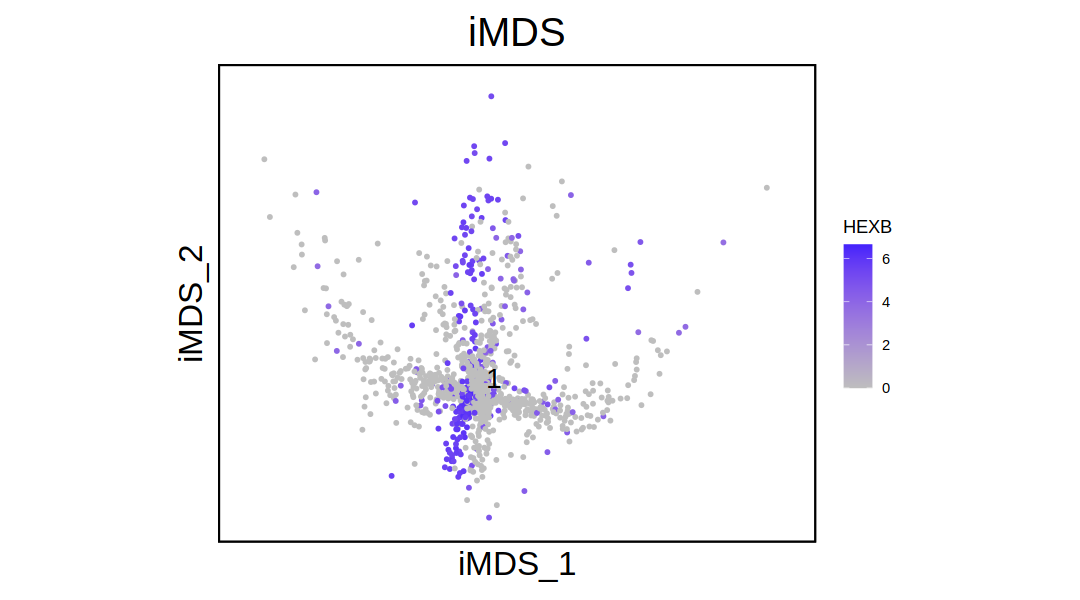

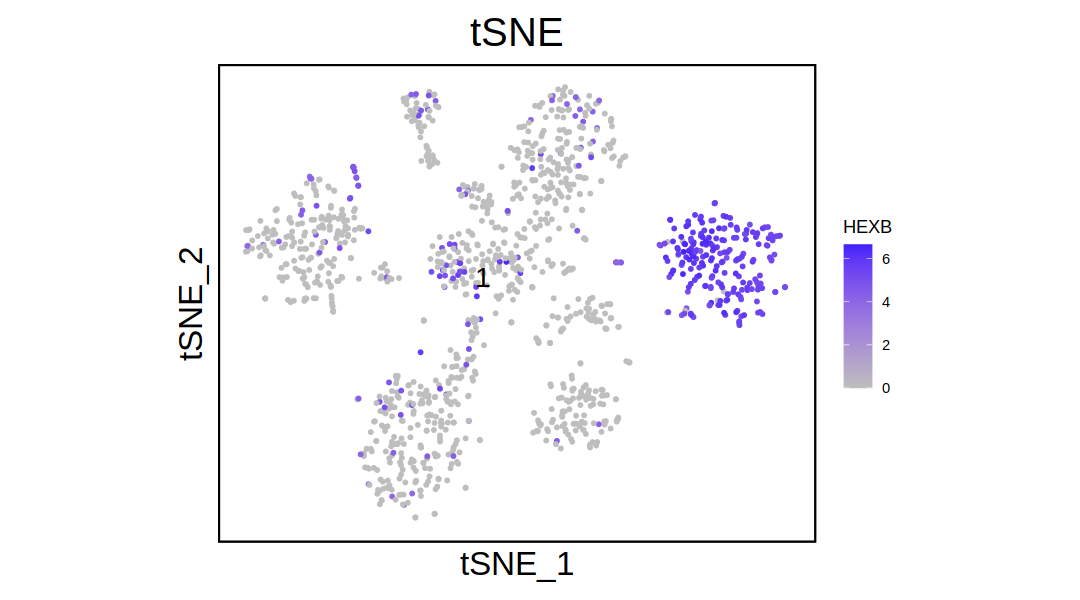

In [12]:
V_gene = "HEXB"
p <- FeaturePlot(seurat_object, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
    #     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
  guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "ADM") 

# 添加聚类标签
p <- LabelClusters(plot = p, id = "ident", size = 6)

# 打印图形
print(p)

p1 <- FeaturePlot(seurat_object1, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "meta-spec") 

# 添加聚类标签
p1 <- LabelClusters(plot = p1, id = "ident", size = 6)

# 打印图形
print(p1)

p2 <- FeaturePlot(seurat_object2, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "UMAP") 

# 添加聚类标签
p2 <- LabelClusters(plot = p2, id = "ident", size = 6)

# 打印图形
print(p2)
p3 <- FeaturePlot(seurat_object3, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "kPCA") 

# 添加聚类标签
p3 <- LabelClusters(plot = p3, id = "ident", size = 6)

# 打印图形
print(p3)

p4<- FeaturePlot(seurat_object4, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "iMDS") 

# 添加聚类标签
p4 <- LabelClusters(plot = p4, id = "ident", size = 6)
print(p4)

p5<- FeaturePlot(seurat_object5, features = V_gene, reduction = "umap") +
  scale_color_gradient(low = "grey", high = "#4322FC") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.2),
    panel.spacing = unit(0.1, "npc"),
    legend.position = "right",  # 根据需要可以调整图例位置
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 0.8,
#     axis.title = element_text(face = "bold"),
    axis.title.x = element_text(size = axis_size),  # 设置横轴标题的字体大小
    axis.title.y = element_text(size = axis_size),
    plot.title = element_text(hjust = 0.5, size = title_size)
  ) +
 guides(color = guide_colourbar(title = V_gene, title.position = "top", title.hjust = 0.5))+
labs(title = "tSNE") 

# 添加聚类标签
p5 <- LabelClusters(plot = p5, id = "ident", size = 6)
print(p5)

ggsave(paste("Figure/ADM_",V_gene, ".png"), plot = p, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/meta_spec_",V_gene,".png"), plot = p1, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/UMAP_",V_gene, ".png"), plot = p2, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/kPCA_",V_gene, ".png"), plot = p3, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/iMDS_",V_gene, ".png"), plot = p4, width = 6, height = 4, dpi = 420)
ggsave(paste("Figure/tSNE_",V_gene, ".png"), plot = p5, width = 6, height = 4, dpi = 420)